<h1>SOLAR RADIATION PREDICTION USING RANDOM FOREST</h1>

DATASET - https://www.kaggle.com/datasets/dronio/SolarEnergy

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('solar_radiation_data.csv')
data

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [ ]:
data['TimeSunRise'] = pd.to_datetime(data['TimeSunRise'], errors = 'coerce', dayfirst = True)
data['TimeSunRise'] = pd.to_numeric(data['TimeSunRise'])

In [ ]:
data['TimeSunSet'] = pd.to_datetime(data['TimeSunSet'], errors = 'coerce', dayfirst = True)
data['TimeSunSet'] = pd.to_numeric(data['TimeSunSet'])

In [ ]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,1706681580000000000,1706724780000000000
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,1706681580000000000,1706724780000000000
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,1706681580000000000,1706724780000000000
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,1706681580000000000,1706724780000000000
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,1706681580000000000,1706724780000000000


In [ ]:
data = data.drop(['Data','Time'], axis=1)
data

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,1.21,48,30.46,59,177.39,5.62,1706681580000000000,1706724780000000000
1,1475229023,1.21,48,30.46,58,176.78,3.37,1706681580000000000,1706724780000000000
2,1475228726,1.23,48,30.46,57,158.75,3.37,1706681580000000000,1706724780000000000
3,1475228421,1.21,48,30.46,60,137.71,3.37,1706681580000000000,1706724780000000000
4,1475228124,1.17,48,30.46,62,104.95,5.62,1706681580000000000,1706724780000000000
...,...,...,...,...,...,...,...,...,...
32681,1480587604,1.22,44,30.43,102,145.42,6.75,1706683260000000000,1706722920000000000
32682,1480587301,1.17,44,30.42,102,117.78,6.75,1706683260000000000,1706722920000000000
32683,1480587001,1.20,44,30.42,102,145.19,9.00,1706683260000000000,1706722920000000000
32684,1480586702,1.23,44,30.42,101,164.19,7.87,1706683260000000000,1706722920000000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Radiation               32686 non-null  float64
 2   Temperature             32686 non-null  int64  
 3   Pressure                32686 non-null  float64
 4   Humidity                32686 non-null  int64  
 5   WindDirection(Degrees)  32686 non-null  float64
 6   Speed                   32686 non-null  float64
 7   TimeSunRise             32686 non-null  int64  
 8   TimeSunSet              32686 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 2.2 MB


In [ ]:
data[data.duplicated()].any()

UNIXTime                  False
Radiation                 False
Temperature               False
Pressure                  False
Humidity                  False
WindDirection(Degrees)    False
Speed                     False
TimeSunRise               False
TimeSunSet                False
dtype: bool

In [ ]:
data.isnull().any()

UNIXTime                  False
Radiation                 False
Temperature               False
Pressure                  False
Humidity                  False
WindDirection(Degrees)    False
Speed                     False
TimeSunRise               False
TimeSunSet                False
dtype: bool

In [ ]:
data['Radiation'].describe()

count    32686.000000
mean       207.124697
std        315.916387
min          1.110000
25%          1.230000
50%          2.660000
75%        354.235000
max       1601.260000
Name: Radiation, dtype: float64

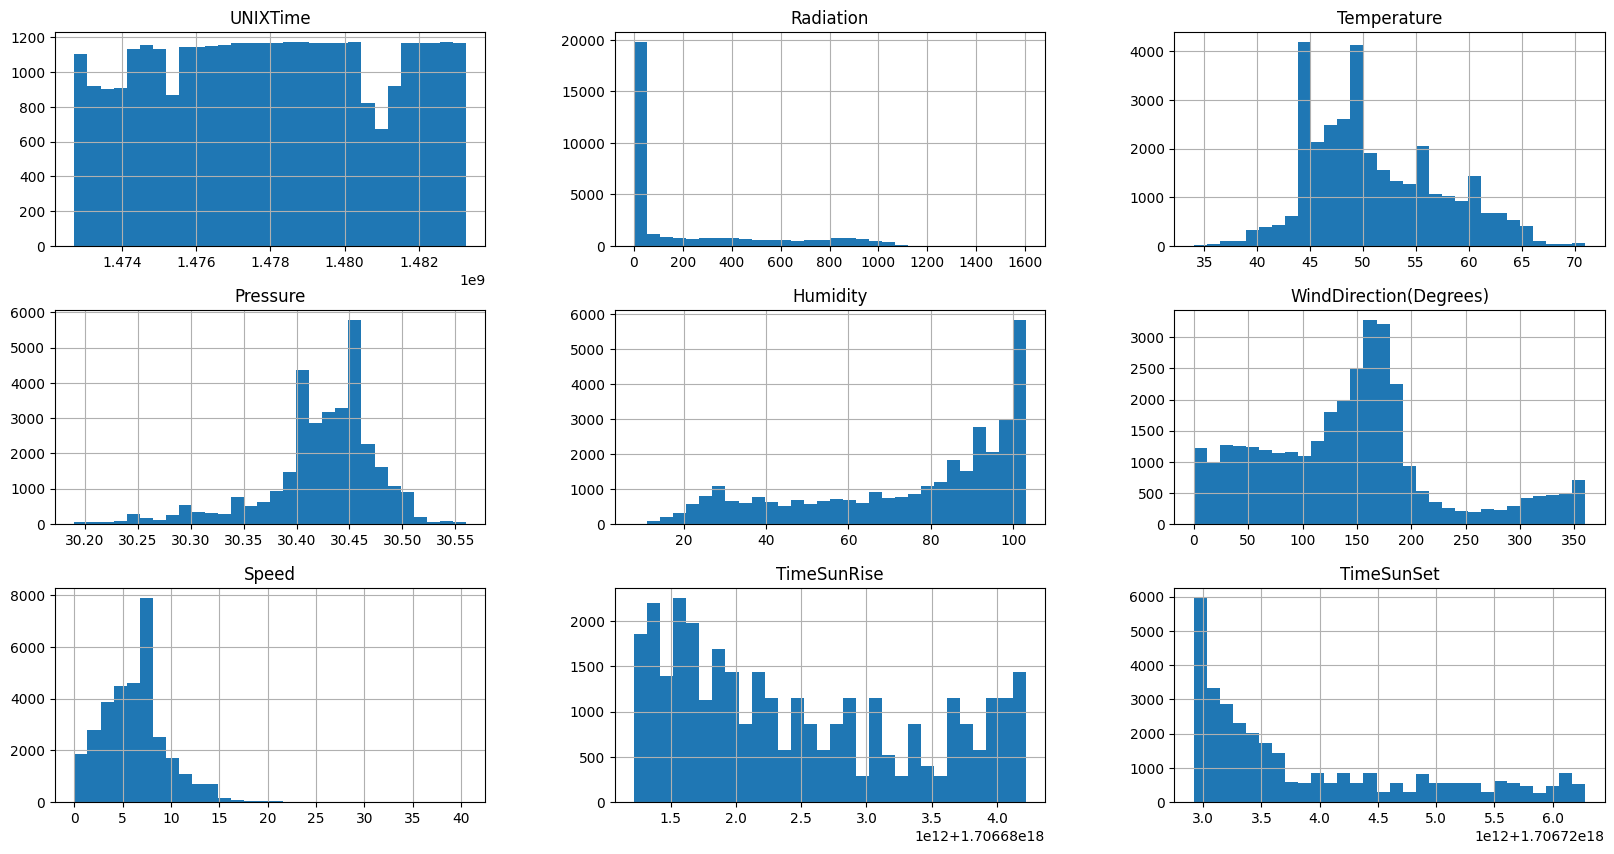

In [ ]:
data.hist(bins=30, figsize=(20,10), layout=(3,3))
plt.show()

<Axes: >

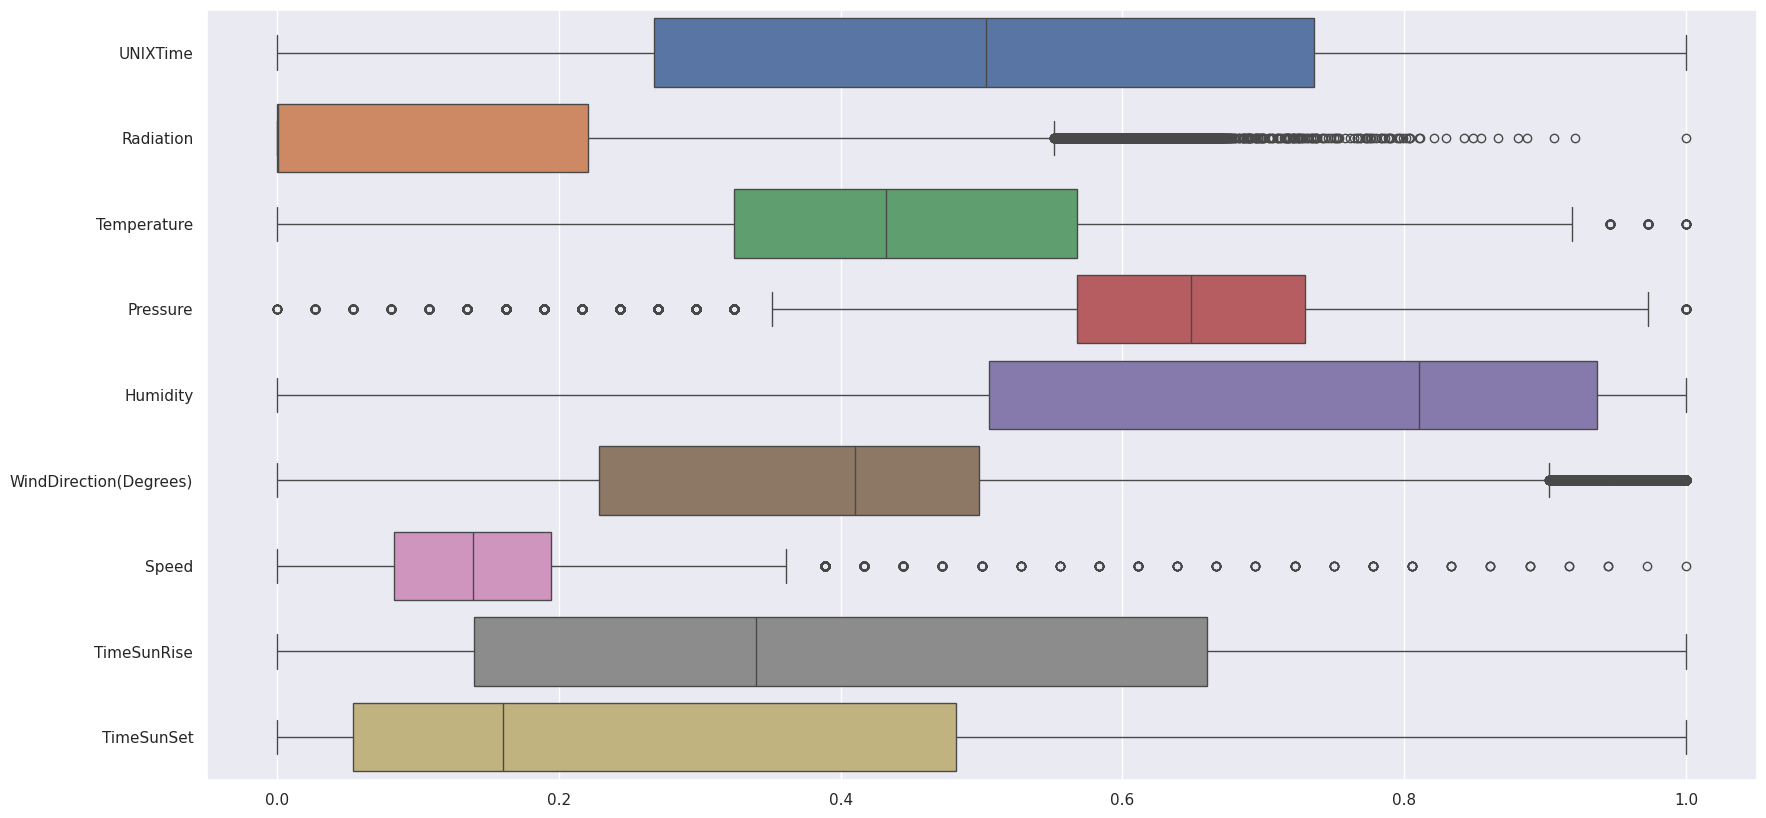

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
df = pd.DataFrame(scaled_data, columns = data.columns)

plt.figure(figsize=(20,10))
sns.set(font_scale=1)
sns.boxplot(data=df, orient='h')

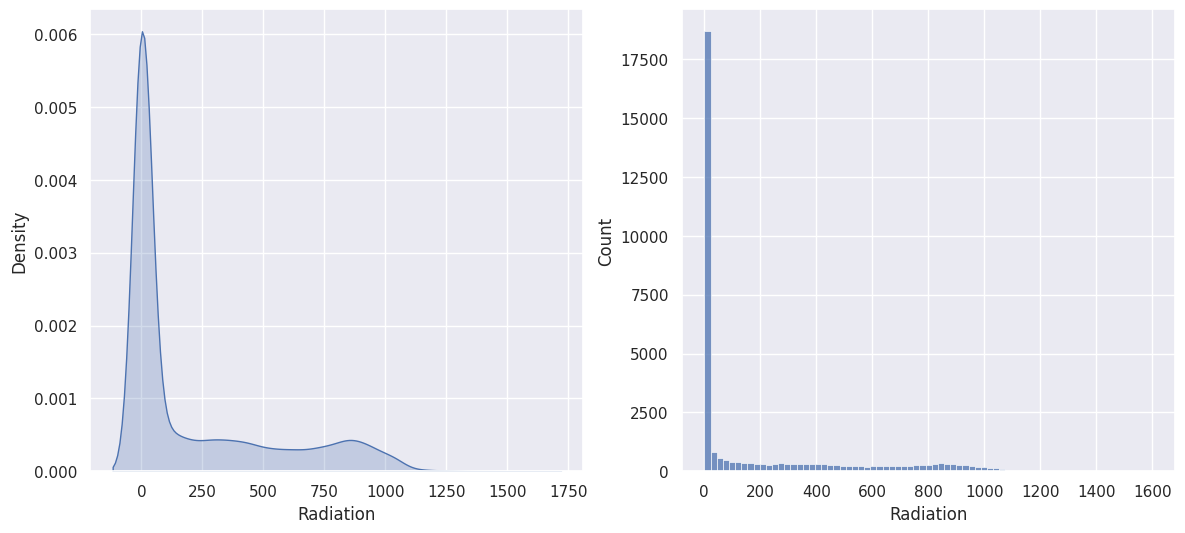

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
sns.kdeplot(data['Radiation'], label='Radiation', fill=True)

plt.subplot(1,2,2)
sns.histplot(data['Radiation'], label='Radiation', fill=True)

plt.show()

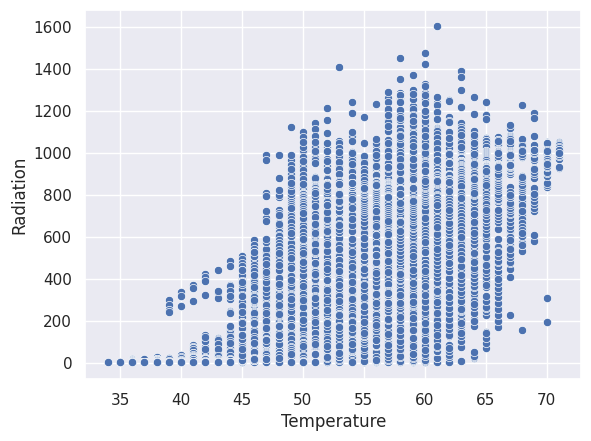

In [ ]:
sns.scatterplot(x='Temperature', y='Radiation', data=data)
plt.show()

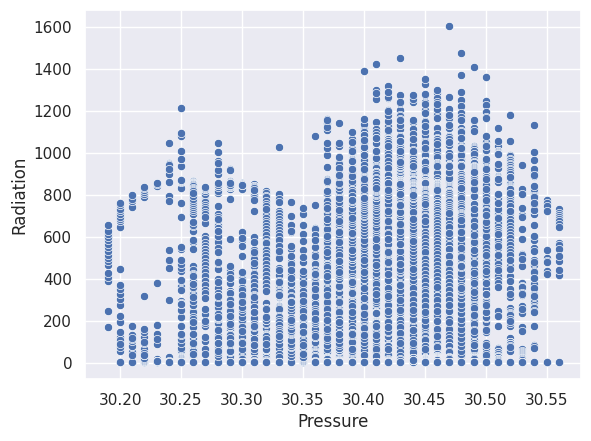

In [ ]:
sns.scatterplot(x='Pressure', y='Radiation', data=data)
plt.show()

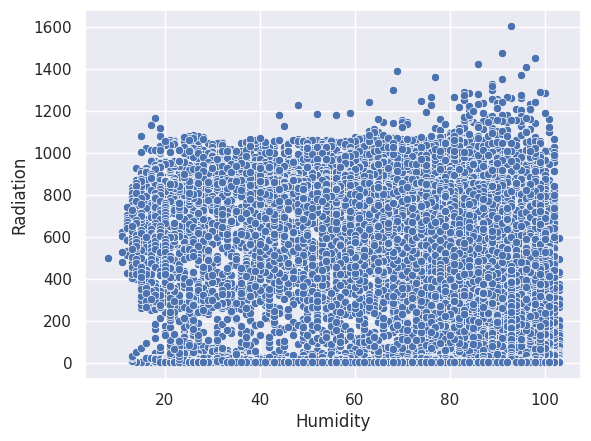

In [ ]:
sns.scatterplot(x='Humidity', y='Radiation', data=data)
plt.show()

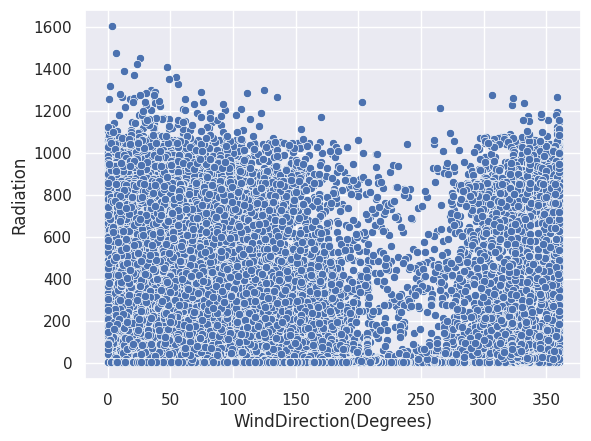

In [ ]:
sns.scatterplot(x='WindDirection(Degrees)', y='Radiation', data=data)
plt.show()

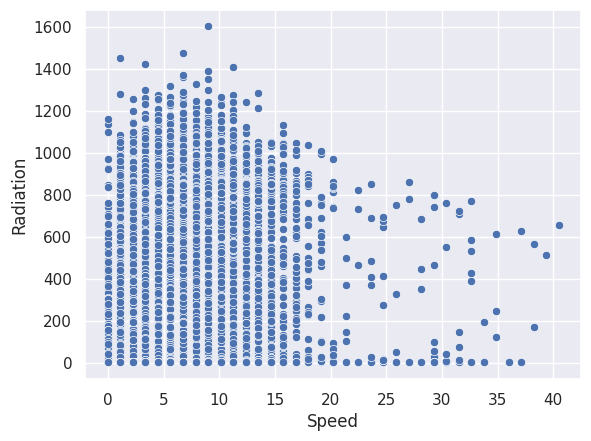

In [ ]:
sns.scatterplot(x='Speed', y='Radiation', data=data)
plt.show()

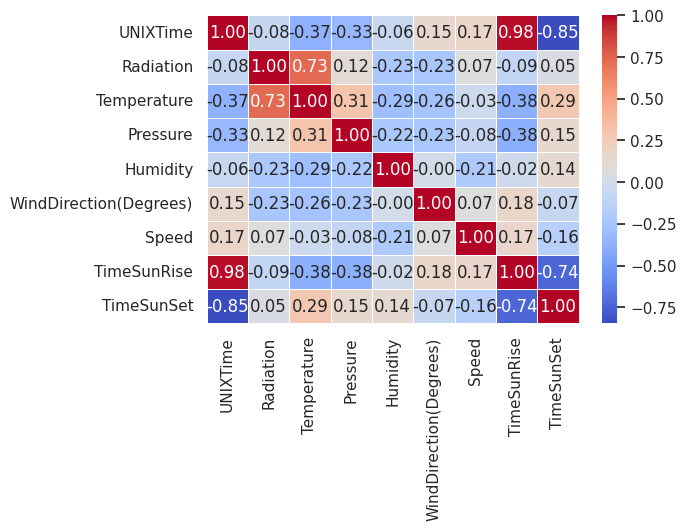

In [ ]:
correlations = data.corr()

plt.figure(figsize=(6,4))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
x = data.drop('Radiation', axis=1)
y = data['Radiation']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
RF = RandomForestRegressor(n_estimators=35, max_depth=20, random_state=21)
RF.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=35, random_state=21)

In [ ]:
train_r2_rf = RF.score(x_train,y_train)
test_r2_rf = RF.score(x_test,y_test)

In [ ]:
print(f"\nThe R^2 score of RandomForest model on training data is : {train_r2_rf}")
print(f"\nThe R^2 score of RandomForest model on testing data is : {test_r2_rf}")


The R^2 score of RandomForest model on training data is : 0.9838117092265564

The R^2 score of RandomForest model on testing data is : 0.9004515785906451


In [ ]:
training_predictions_rf = RF.predict(x_train)
testing_predictions_rf = RF.predict(x_test)

In [ ]:
print('Mean Absolute Error (Training) (RF):    ',mean_absolute_error(y_train, training_predictions_rf))
print('Mean Squared Error (Training) (RF):     ',mean_squared_error(y_train, training_predictions_rf))
print('Root Mean Squared Error (Training) (RF):',np.sqrt(mean_squared_error(y_train, training_predictions_rf)))
print()
print('Mean Absolute Error (Testing) (RF):    ',mean_absolute_error(y_test, testing_predictions_rf))
print('Mean Squared Error (Testing) (RF):     ',mean_squared_error(y_test, testing_predictions_rf))
print('Root Mean Squared Error (Testing) (RF):',np.sqrt(mean_squared_error(y_test, testing_predictions_rf)))

Mean Absolute Error (Training) (RF):     18.718540226800854
Mean Squared Error (Training) (RF):      1566.1137650099654
Root Mean Squared Error (Training) (RF): 39.57415526590511

Mean Absolute Error (Testing) (RF):     46.044711851714546
Mean Squared Error (Testing) (RF):      9664.96268700769
Root Mean Squared Error (Testing) (RF): 98.31054209497418


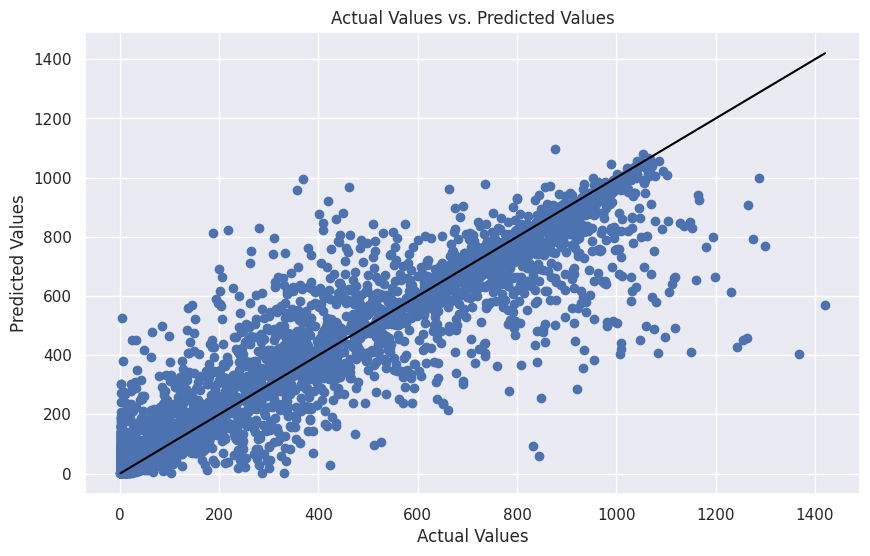

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, testing_predictions_rf)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs. Predicted Values')
x_line = np.linspace(min(y_test), max(y_test), 100)
y_line = x_line
plt.plot(x_line, y_line, color='black', linestyle='-')
plt.show()

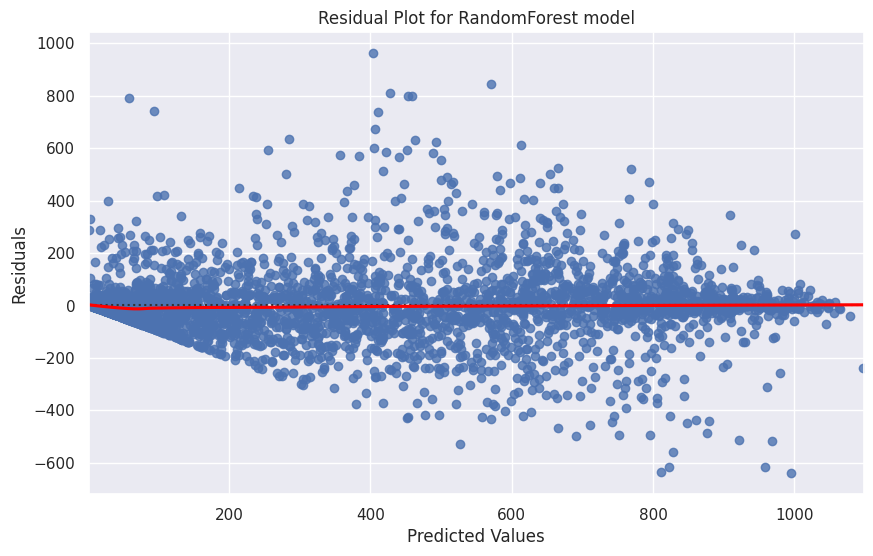

In [ ]:
residuals_rf = y_test - testing_predictions_rf
plt.figure(figsize=(10,6))
sns.residplot(x=testing_predictions_rf, y=residuals_rf, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot for RandomForest model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

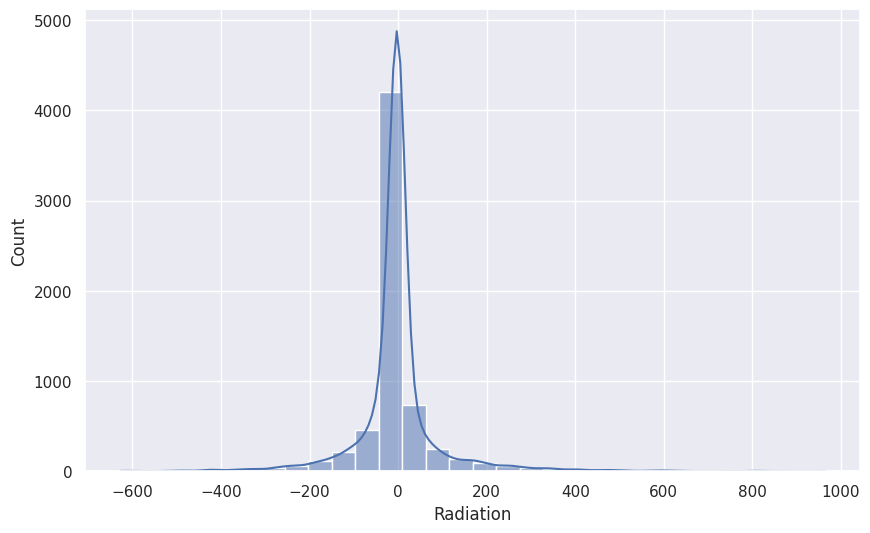

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(residuals_rf, bins=30, kde=True)
plt.show()

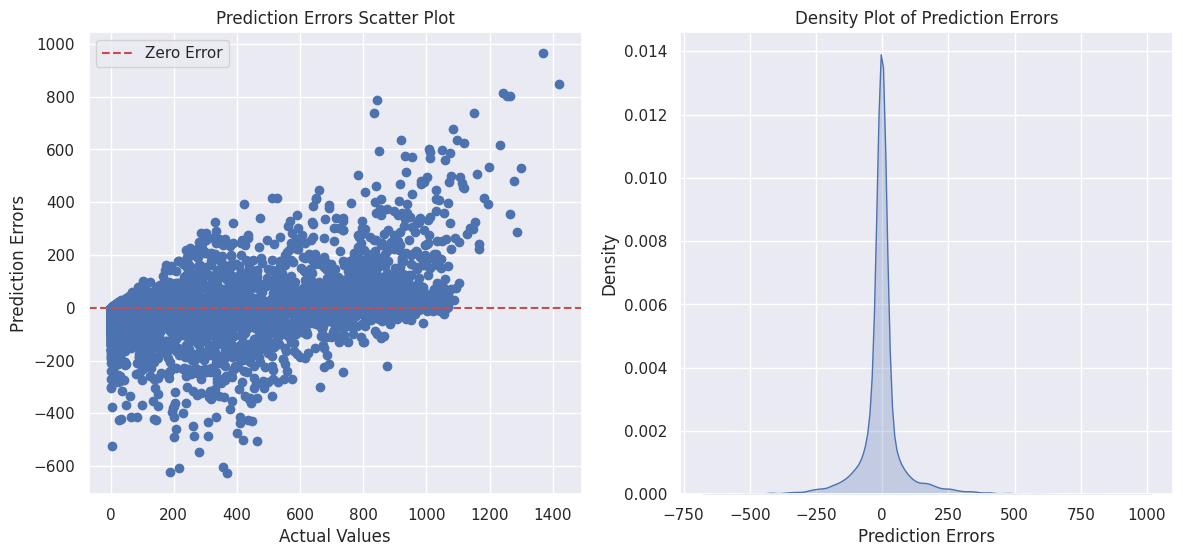

In [ ]:
errors = y_test - RF.predict(x_test)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(y_test, errors)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Error')
plt.xlabel('Actual Values')
plt.ylabel('Prediction Errors')
plt.title('Prediction Errors Scatter Plot')
plt.legend()

plt.subplot(1,2,2)
sns.kdeplot(errors, fill=True)
plt.xlabel('Prediction Errors')
plt.ylabel('Density')
plt.title('Density Plot of Prediction Errors')

plt.show()